In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
plot_train_data = train_data[train_data.Survived == 1]
plot_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


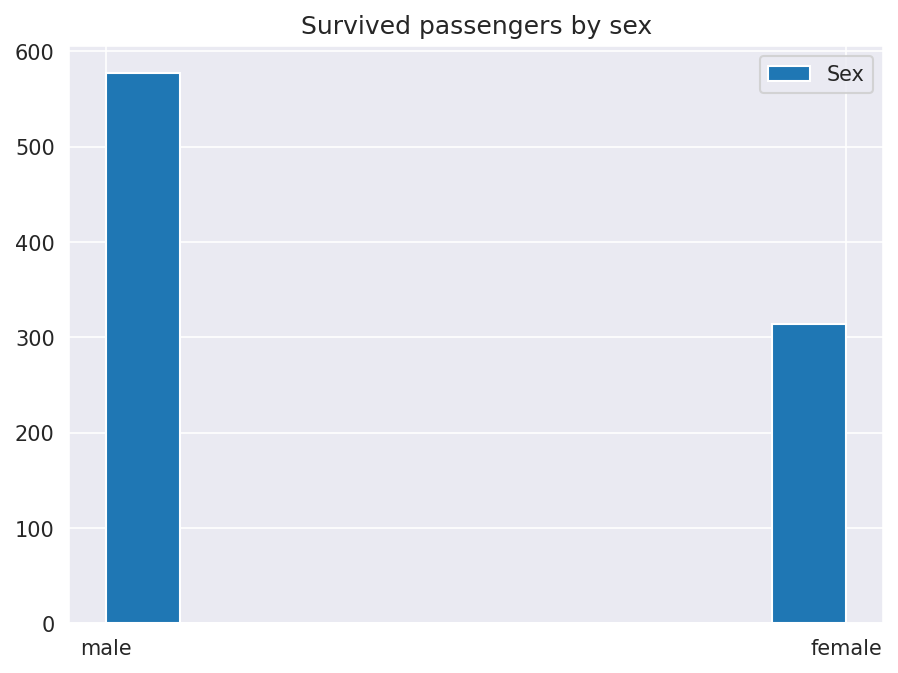

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Survived passengers by sex')
plt.hist(train_data['Sex'], label = 'Sex')
plt.legend()

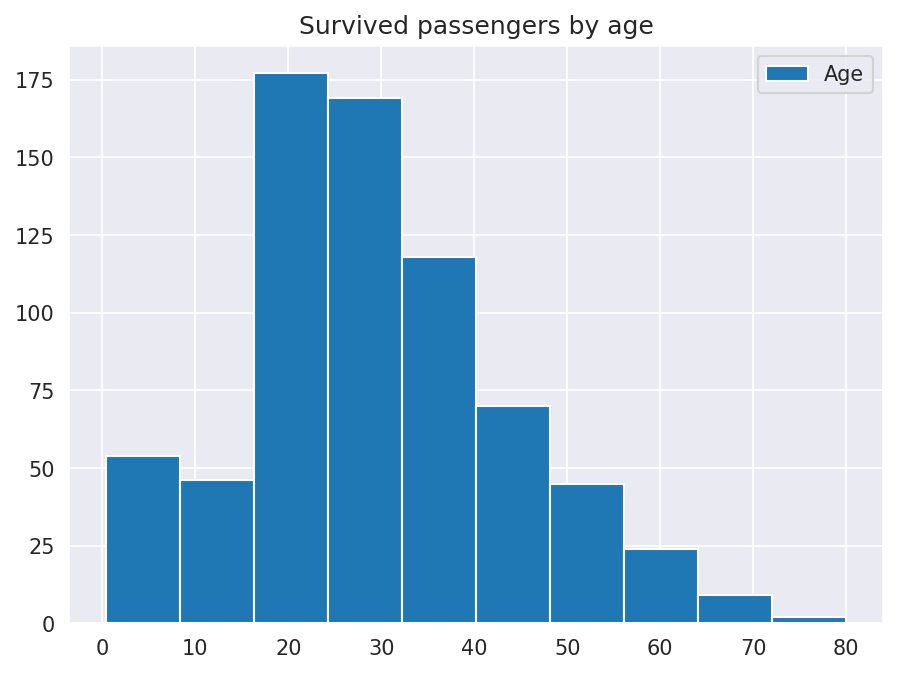

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Survived passengers by age')
plt.hist(train_data['Age'], label = 'Age')
plt.legend()

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(rate_women, "% of survived")

0.7420382165605095 % of survived


1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [12]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(rate_men, "% of survived men")

0.18890814558058924 % of survived men


In [13]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [14]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
x = pd.get_dummies(train_data[features])
x_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(x, y)
predictions = model.predict(x_test)
predictions

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Nice try for your first Kaggle project")

Nice try for your first Kaggle project


In [15]:
predicted_data = pd.read_csv('submission.csv')
predicted_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [16]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
test_data.insert(0, 'Survived', predicted_data.Survived, allow_duplicates = False)

In [18]:
test_data.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


women_test = test_data.loc[test_data.Sex = 'female']["Survived"]
women_test

In [19]:
women_test = test_data.loc[test_data.Sex == 'female']["Survived"]
wrate_test = sum(women_test)/len(women_test)
print(wrate_test, "% of predicted women Survived")

0.9473684210526315 % of predicted women Survived


In [20]:
predicted_men = test_data.loc[test_data.Sex == 'male']["Survived"]
rate_predicted_men = sum(predicted_men)/len(predicted_men)
print(rate_predicted_men, "% of predicted men survived")


0.015037593984962405 % of predicted men survived


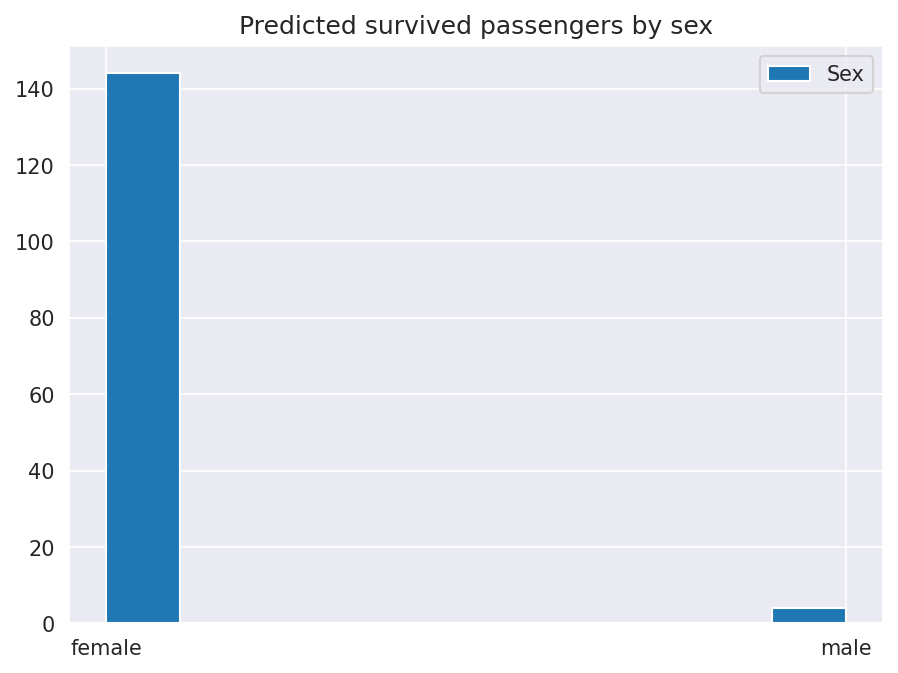

In [30]:
plot_predicted_data = test_data.loc[test_data.Survived == 1]

sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Predicted survived passengers by sex')
plt.hist(plot_predicted_data['Sex'], label = 'Sex')
plt.legend()

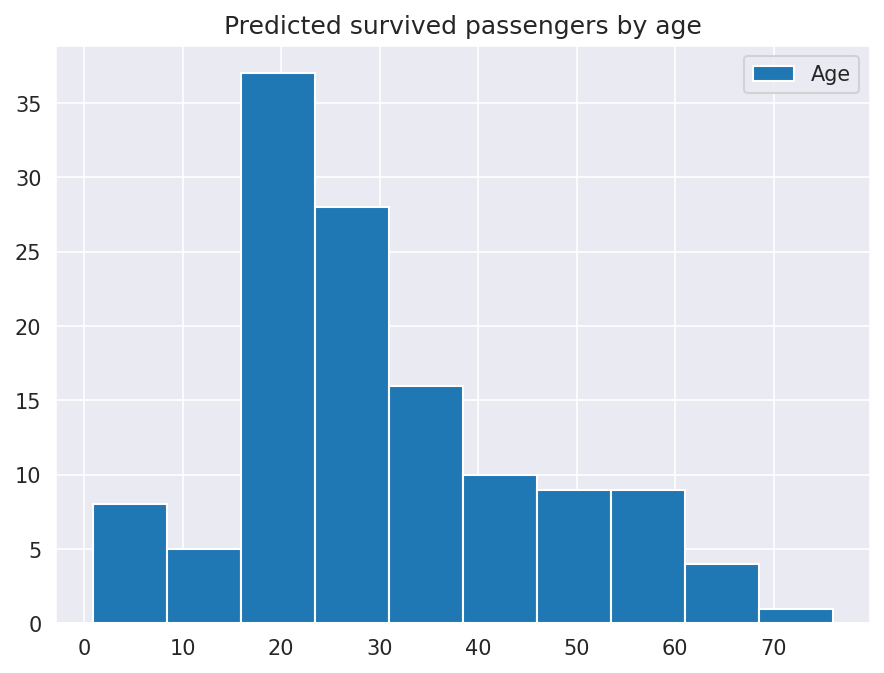

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Predicted survived passengers by age')
plt.hist(plot_predicted_data['Age'], label = 'Age')
plt.legend()

In [23]:
number_of_women = len(women)
number_of_men = len(men)
survived_women = len(women) - sum(women)
survived_men = len(men) - sum(men)

print(number_of_women, "Total women in train_data,", survived_women, "did not survive and", sum(women), "survived")
print(number_of_men, "Total men in train data,", survived_men, "did not survive and", sum(men), "survived")

314 Total women in train_data, 81 did not survive and 233 survived
577 Total men in train data, 468 did not survive and 109 survived


In [24]:
number_of_women = len(women_test)
number_of_men = len(predicted_men)
survived_women = len(women_test) - sum(women_test)
survived_men = len(predicted_men) - sum(predicted_men)

print(number_of_women, "Total women in train_data,", survived_women, "did not survive and", sum(women_test), "survived")
print(number_of_men, "Total men in train data,", survived_men, "did not survive and", sum(predicted_men), "survived")

152 Total women in train_data, 8 did not survive and 144 survived
266 Total men in train data, 262 did not survive and 4 survived


# 152 Total women in train_data, 8 did not survive and 144 survived
# 266 Total men in train data, 262 did not survive and 4 survived

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_x, train_y)
val_predictions = melbourne_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))

def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

0.2788156218892371


# Predicted error 
# 0.2788156218892371